License:
This code and the accompanying files is a preliminary release that has the exclusive purpose to facilitate the review process of the paper entitled "Learning the piece-wise constant graph structure of a varying Ising model" for publication in the ICML 2020. The code will be further polished to improve its utility and user-friendliness, and then will become available online after the publication.

Please do not distribute to others or use this work for other purpose.

Read the README.txt file for more information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import TVI_FL

In [2]:
Train_df = pd.read_csv('./Train.csv', sep = ';', header = None)
Info_party = np.array(pd.read_csv('./Party_info.csv', sep = ';')).ravel()

In [3]:
# Construct Train dataset as list of array (one for each vote)

X_train = [np.array(result).reshape((-1,1)) for (vote, result) in Train_df.iteritems()]

# Learning

In [4]:
# The hyperparameters found to be the best using AIC

l1 = 0.8
l2 = 0.3

Graph, ChangePoints = TVI_FL.TVI_FL(X_train, l1, l2)

Learning neighborhood of node number 1/18...
Learning neighborhood of node number 2/18...
Learning neighborhood of node number 3/18...
Learning neighborhood of node number 4/18...
Learning neighborhood of node number 5/18...
Learning neighborhood of node number 6/18...
Learning neighborhood of node number 7/18...
Learning neighborhood of node number 8/18...
Learning neighborhood of node number 9/18...
Learning neighborhood of node number 10/18...
Learning neighborhood of node number 11/18...
Learning neighborhood of node number 12/18...
Learning neighborhood of node number 13/18...
Learning neighborhood of node number 14/18...
Learning neighborhood of node number 15/18...
Learning neighborhood of node number 16/18...
Learning neighborhood of node number 17/18...
Learning neighborhood of node number 18/18...


In [5]:
# Run This cell to directly obtain the results

Graph = np.load('./LearnedGraphs.npy')
ChangePoints = np.load('./ChangePoints.npy')

# Results


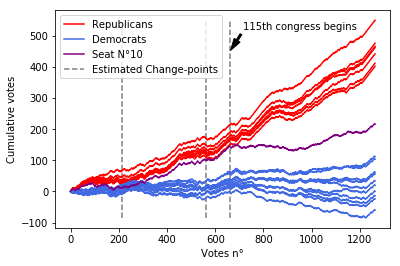

In [6]:
##############################################################################
######### Cumulative distribution functions of each seats, by party ##########
##############################################################################

n = len(X_train)
p = X_train[0].shape[0]

Train_array = np.array(X_train).reshape((n, p)).T

Train_cumul = np.zeros(Train_array.shape)
for i in range(n):
    Train_cumul[:, i] = np.sum(Train_array[:, :i + 1], 1)


plt.figure()
for rep in np.where(Info_party == 'rep')[0]:
    line_up, = plt.plot(Train_cumul[rep, :], 'red')

for dem in np.where(Info_party == 'dem')[0]:
    line_down, = plt.plot(Train_cumul[dem, :], 'royalblue')

line_mid, = plt.plot(Train_cumul[9, :], 'purple')

plt.xlabel('Votes n°')
plt.ylabel('Cumulative votes')

CPP = ChangePoints
line_cp = plt.vlines(CPP + 1, np.min(Train_cumul),
                     np.max(Train_cumul), colors='grey', linestyles='dashed')

plt.legend([line_up, line_down, line_mid, line_cp], ['Republicans', 'Democrats', 
                                                     'Seat N°10', 'Estimated Change-points'])

_ = plt.annotate('115th congress begins', xy=(661, 450),  xycoords='data',
                 xytext=(0.9, 0.95), textcoords='axes fraction',
                 arrowprops=dict(width=2, headwidth=7, facecolor='black', shrink=0.05),
                 horizontalalignment='right', verticalalignment='top')

(-1.1218065960935804,
 0.9888656719897551,
 -0.36104287142496444,
 0.4048899016977071)

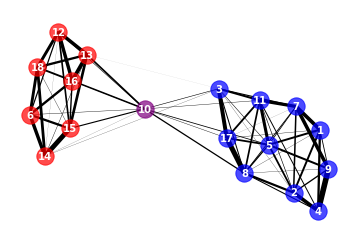

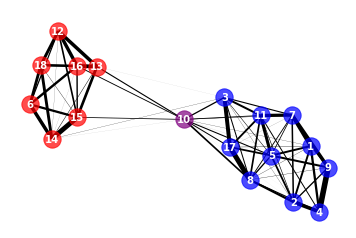

In [7]:
# Initialize layout using first graph
i = 0
W = abs((Graph[i] > 0) * Graph[i])
W = (W + W.T) * .5
G = nx.from_numpy_matrix(W)
pos = nx.spring_layout(G, seed=123)

TVI_FL.plot_graph(0, pos, Graph, Info_party)  # Plot first graph

plt.axis('off')

plt.figure(2)
TVI_FL.plot_graph(800, pos, Graph, Info_party)  # Plot second graph
plt.axis('off')